In [1]:
# This file is trying to repeat some results showed in Tamas Vicsek's article: 
# Novel Type of Phase Transition in a System of Self-Driven Particles
# While considering that the pc do not have enough ability to caculate 
# the eta versus va figure, so codes have been shown in the last block 
# but do not have results like others
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt,pi,cos,sin
import matplotlib.animation as animation

In [2]:
class Particle:
    def __init__(self, index, locationx,locationy, theta):
        self.index = index
        self.locationx = locationx
        self.locationy = locationy
        self.theta = theta
        self.vx = cos(self.theta)
        self.vy = sin(self.theta)
        
        if (locationx < 1 or locationx > L-1 or locationy < 1 or locationy > L-1):
            self.bound  = 1
        else:
            self.bound = 0
    def distance(self, particleList):
        N = len(particleList)
        self.d = np.zeros(N)
        for i in range(N):
            if (i == self.index):
                self.d[i] = 0
                continue
            else:
                if (i > self.index):  
                    self.d[i] = sqrt((particleList[i].locationx-self.locationx)**2+\
                                (particleList[i].locationy-self.locationy)**2)
                    if (self.bound*particleList[i].bound == 1):
                        if (self.d[i]>1):
                            qsx = (particleList[i].locationx-self.locationx)**2
                            qsy = (particleList[i].locationy-self.locationy)**2
                            if (abs(self.locationx-particleList[i].locationx) > L - 1):
                                qsx = (abs(particleList[i].locationx-self.locationx)-L)**2
                            if (abs(self.locationy-particleList[i].locationy) > L - 1):
                                qsy = (abs(particleList[i].locationy-self.locationy)-L)**2    
                            self.d[i] = sqrt(qsx+qsy)
                else:
                    self.d[i] = particleList[i].d[self.index]
        self.relativity = np.zeros(N)
        angle_sum = 0
        k = 0
        for i in range(N):
            if (self.d[i] <= 1):
                self.relativity[i] = 1
                angle_sum = angle_sum+particleList[i].theta
                k = k + 1
            else:
                self.relativity[i] = 0
        self.angle_average = angle_sum/k + np.random.uniform(-eta/2, eta/2)
    def motion(self):
        self.locationx = self.locationx + cos(self.angle_average)
        self.locationy = self.locationy + sin(self.angle_average)
        self.theta = self.angle_average
        if (self.locationx > L) :
            self.locationx = self.locationx - L
        if (self.locationy > L) :
            self.locationy = self.locationy - L            
        if (self.locationx < 0) :
            self.locationx = self.locationx + L
        if (self.locationy < 0) :
            self.locationy = self.locationy + L               
        self.vx = cos(self.theta)
        self.vy = sin(self.theta)

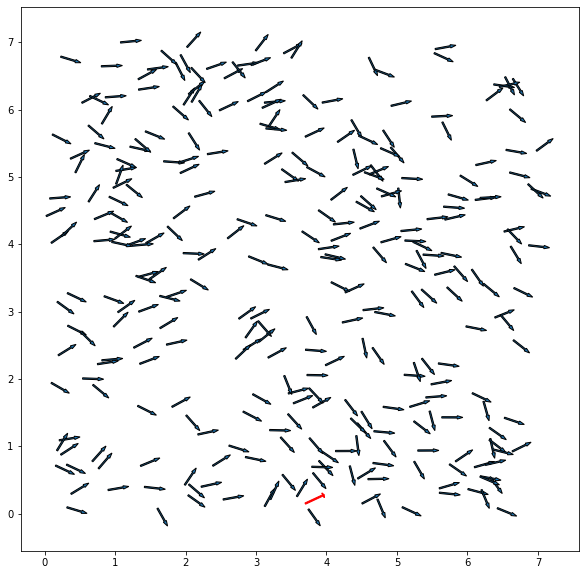

In [3]:
particleList = list([])
N = 300
L = 7
x = np.zeros(N)
y = np.zeros(N)
theta = np.zeros(N)
eta = 2 
for i in range(N):
    x[i] = np.random.uniform(0, L)
    y[i] = np.random.uniform(0, L)
    theta[i] = np.random.uniform(-pi,pi)
    particle = Particle(index = i, locationx = x[i],locationy = y[i], theta = theta[i])
    particleList.append(particle)
for i in range(N):
    particleList[i].distance(particleList)


for j in range(30):
    for i in range(N):
        particleList[i].distance(particleList)
    for i in range(N):
        particleList[i].motion()
        x[i] = particleList[i].locationx
        y[i] = particleList[i].locationy
plt.figure(figsize = (10,10))
plt.plot(x,y,'.',markersize = 0.1)
plt.arrow(particleList[0].locationx, particleList[i].locationy,\
          0.3*cos(particleList[0].angle_average),\
          0.3*sin(particleList[0].angle_average),\
          color = 'r',width=0.02,head_width=0.08,head_length=0.02,length_includes_head=True)

for i in range(N):
    plt.arrow(particleList[i].locationx, particleList[i].locationy,\
              0.3*cos(particleList[i].angle_average),\
              0.3*sin(particleList[i].angle_average),\
              width=0.02,head_width=0.05,head_length=0.08,length_includes_head=True)

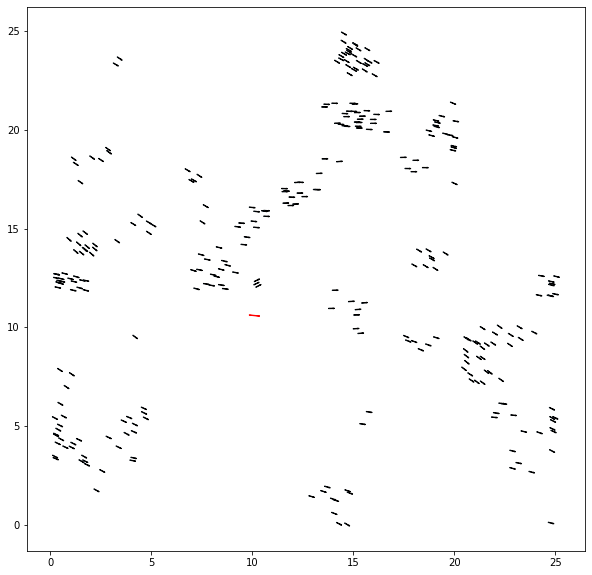

In [4]:
particleList = list([])
N = 300
L = 25
x = np.zeros(N)
y = np.zeros(N)
theta = np.zeros(N)
eta = 0.1 
for i in range(N):
    x[i] = np.random.uniform(0, L)
    y[i] = np.random.uniform(0, L)
    theta[i] = np.random.uniform(-pi,pi)
    particle = Particle(index = i, locationx = x[i],locationy = y[i], theta = theta[i])
    particleList.append(particle)
for i in range(N):
    particleList[i].distance(particleList)


for j in range(30):
    for i in range(N):
        particleList[i].distance(particleList)
    for i in range(N):
        particleList[i].motion()
        x[i] = particleList[i].locationx
        y[i] = particleList[i].locationy
plt.figure(figsize = (10,10))
plt.plot(x,y,'.',markersize = 0.1)
plt.arrow(particleList[0].locationx, particleList[i].locationy,\
          0.5*cos(particleList[0].angle_average),\
          0.5*sin(particleList[0].angle_average),\
          color = 'r',width=0.02,head_width=0.08,head_length=0.02,length_includes_head=True)

for i in range(N):
    plt.arrow(particleList[i].locationx, particleList[i].locationy,\
              0.3*cos(particleList[i].angle_average),\
              0.3*sin(particleList[i].angle_average),\
              width=0.02,head_width=0.05,head_length=0.08,length_includes_head=True)

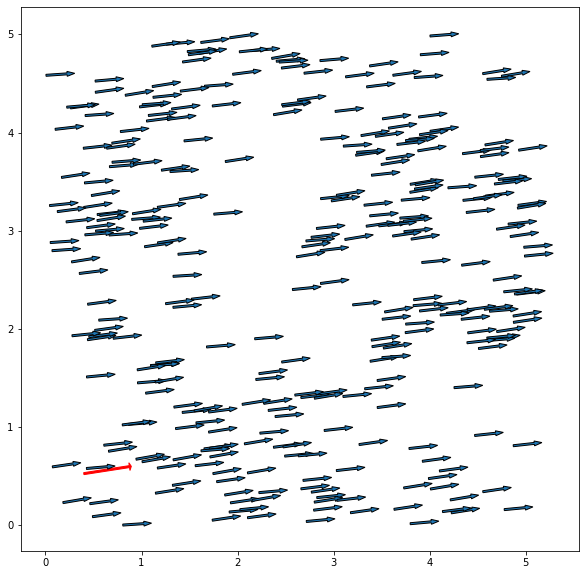

In [5]:
particleList = list([])
N = 300
L = 5
x = np.zeros(N)
y = np.zeros(N)
theta = np.zeros(N)
eta = 0.1 
for i in range(N):
    x[i] = np.random.uniform(0, L)
    y[i] = np.random.uniform(0, L)
    theta[i] = np.random.uniform(-pi,pi)
    particle = Particle(index = i, locationx = x[i],locationy = y[i], theta = theta[i])
    particleList.append(particle)
for i in range(N):
    particleList[i].distance(particleList)


for j in range(30):
    for i in range(N):
        particleList[i].distance(particleList)
    for i in range(N):
        particleList[i].motion()
        x[i] = particleList[i].locationx
        y[i] = particleList[i].locationy
plt.figure(figsize = (10,10))
plt.plot(x,y,'.',markersize = 0.1)
plt.arrow(particleList[0].locationx, particleList[i].locationy,\
          0.5*cos(particleList[0].angle_average),\
          0.5*sin(particleList[0].angle_average),\
          color = 'r',width=0.02,head_width=0.08,head_length=0.02,length_includes_head=True)

for i in range(N):
    plt.arrow(particleList[i].locationx, particleList[i].locationy,\
              0.3*cos(particleList[i].angle_average),\
              0.3*sin(particleList[i].angle_average),\
              width=0.02,head_width=0.05,head_length=0.08,length_includes_head=True)

In [ ]:
N0 = [40,100,400,4000]
L0 = [3.1,5,10,31.6]
data = np.zeros([100,4])
plt.figure()
for count in range(3):
    N = N0[count]
    L = L0[count]
    particleList = list([])
    x = np.zeros(N)
    y = np.zeros(N)
    theta = np.zeros(N)
    # eta = 2 
    up = 100
    etalist = np.linspace(0,5,up)
    vAverage = np.linspace(0,5,up)

    for k in range(100):
        eta = etalist[k]
        particleList = list([])
        for i in range(N):
            x[i] = np.random.uniform(0, L)
            y[i] = np.random.uniform(0, L)
            theta[i] = np.random.uniform(-pi,pi)
            particle = Particle(index = i, locationx = x[i],locationy = y[i], theta = theta[i])
            particleList.append(particle)

        for j in range(300):
            for i in range(N):
                particleList[i].distance(particleList)
            for i in range(N):
                particleList[i].motion()
                x[i] = particleList[i].locationx
                y[i] = particleList[i].locationy

        vxsum = 0
        vysum = 0

        for i in range(N):
            vxsum = vxsum + particleList[i].vx
            vysum = vysum + particleList[i].vy

        vAverage[k] = sqrt(vxsum**2 + vysum**2)/N
    data[0:up,count] = vAverage[0:up]
plt.plot(data,'.')    